# Time Series Forecasting - ARIMA

In [554]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from pathlib import Path
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [555]:
root = Path('/Users','alexandreberkovic','Desktop', 'Year_4','SIoT','IoT')

In [556]:
df = pd.read_csv(root / 'Output_data/CSV/sensor.csv')

In [557]:
df.columns

Index(['Humidity', 'Temperature', 'Light', 'Time stamp', 'Date'], dtype='object')

In [558]:
df = df.drop('Date',axis = 1)

In [559]:
# time stamp column to ts instead of string
df['Time stamp'] = pd.to_datetime(df['Time stamp'], infer_datetime_format=True)

In [560]:
# # remove humidity levels below 50 (as those should not occur)
df = df.loc[df['Humidity'] >= 50]
# df = df.reset_index()

In [561]:
df = df.set_index('Time stamp')

In [562]:
df.head()

,Humidity,Temperature,Light
Time stamp,,,
2021-11-13 18:45:09.004,62.2,20.0,1256
2021-11-13 19:06:48.147,62.6,20.0,1755
2021-11-13 19:16:49.476,64.7,19.8,1747
2021-11-13 19:26:50.661,65.4,19.5,1736
2021-11-13 19:36:51.835,65.1,19.4,1738


In [563]:
humidity = df['Humidity']
temperature = df['Temperature']
light = df['Light']

In [564]:
# resampling at every 10min 
y = humidity.resample('10min').mean()

In [565]:
# y = y[1058:]

In [566]:
# y = y.dropna()

In [567]:
y.sort_index(inplace=True)

In [568]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [569]:
y

Time stamp
2021-11-13 18:40:00    62.2
2021-11-13 18:50:00     NaN
2021-11-13 19:00:00    62.6
2021-11-13 19:10:00    64.7
2021-11-13 19:20:00    65.4
2021-11-13 19:30:00    65.1
2021-11-13 19:40:00    64.7
2021-11-13 19:50:00    65.3
2021-11-13 20:00:00    66.3
2021-11-13 20:10:00    68.5
2021-11-13 20:20:00    68.3
2021-11-13 20:30:00    67.7
2021-11-13 20:40:00    66.8
2021-11-13 20:50:00    66.1
2021-11-13 21:00:00    65.1
2021-11-13 21:10:00    64.5
2021-11-13 21:20:00    64.3
2021-11-13 21:30:00    63.1
2021-11-13 21:40:00    61.5
2021-11-13 21:50:00    60.6
2021-11-13 22:00:00    59.9
2021-11-13 22:10:00    58.8
2021-11-13 22:20:00    58.4
2021-11-13 22:30:00    59.5
2021-11-13 22:40:00    60.0
2021-11-13 22:50:00    60.0
2021-11-13 23:00:00    60.7
2021-11-13 23:10:00    61.1
2021-11-13 23:20:00    61.9
2021-11-13 23:30:00    62.1
2021-11-13 23:40:00    61.4
2021-11-13 23:50:00    62.3
2021-11-14 00:00:00    63.3
2021-11-14 00:10:00    63.6
2021-11-14 00:20:00    63.0
2021-11-1

In [570]:
y.index == '2021-11-18 04:00:00'

array([False, False, False, ..., False, False, False])

In [571]:
# yNew = y[:631]
yNew = y[3058:]

In [572]:
# yNew = yNew.fillna(method="ffill")
yNew = yNew.interpolate(method='akima')
# yNew.dropna()

In [573]:
# yNew = yNew.fillna(method="ffill")

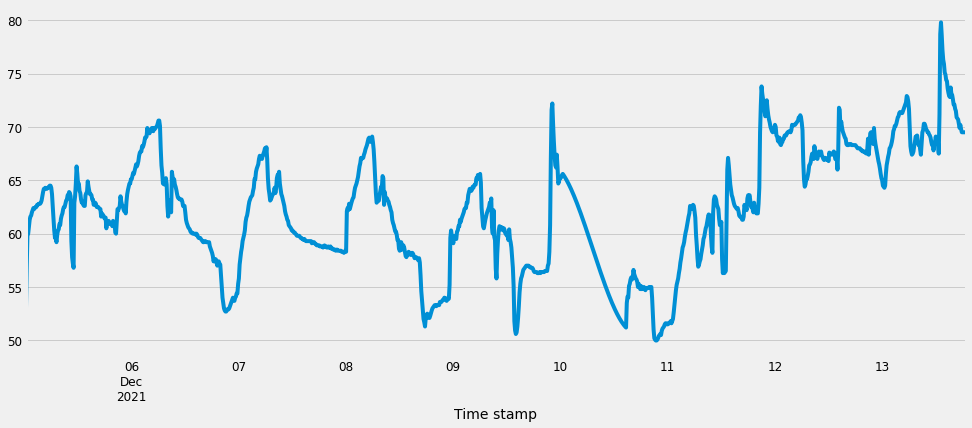

In [574]:
yNew.plot(figsize=(15, 6))
plt.show()

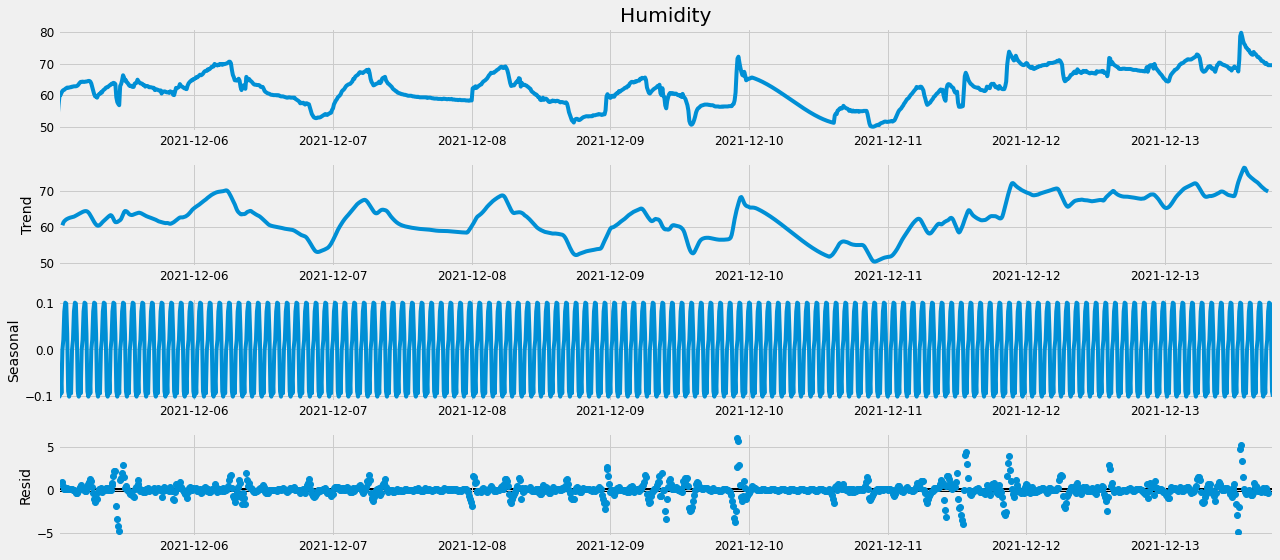

In [575]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(yNew, model='additive',period=10)
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA

In [612]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [613]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yNew, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
        except:
            continue
        

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55006D+00    |proj g|=  3.62803D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.628D-06   5.550D+00
  F =   5.5500586631454532     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:14021.448183105415
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   4.118D-06   2.543D+00
  F =   2.5428965282027671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6427.35663024019
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57373D+00    |proj g|=  1.82500D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     18      1     0     0   1.825D-03   2.574D+00
  F =   2.5737330650938852     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6505.249722427154
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61262D+00    |proj g|=  3.40572D-01

At iterate    5    f=  2.56541D+00    |proj g|=  9.66156D-03

At iterate   10    f=  2.56539D+00    |proj g|=  8.80078D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6432.156080414069
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55710D+00    |proj g|=  1.77805D-01

At iterate    5    f=  2.54310D+00    |proj g|=  8.17961D-03

At iterate   10    f=  2.54271D+00    |proj g|=  3.47008D-04
  ys=-1.387E-02  -gs= 4.862E-05 BFGS update SKIPPED

At iterate   15    f=  2.52439D+00    |proj g|=  2.25875D-02

At iterate   20    f=  2.52384D+00    |proj g|=  7.63700D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg      

 This problem is unconstrained.



At iterate    5    f=  5.17610D+00    |proj g|=  1.17417D-01

At iterate   10    f=  5.17339D+00    |proj g|=  1.19447D-02

At iterate   15    f=  4.96273D+00    |proj g|=  6.01008D-01

At iterate   20    f=  4.86166D+00    |proj g|=  2.53322D-01

At iterate   25    f=  4.85975D+00    |proj g|=  5.73915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     26     60      1     0     0   9.465D-06   4.860D+00
  F =   4.8597472601471106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:12279.721579131601
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f=  5.04279D+00    |proj g|=  3.26619D-02

At iterate   10    f=  5.03840D+00    |proj g|=  1.73722D-02

At iterate   15    f=  4.22736D+00    |proj g|=  4.62234D-01

At iterate   20    f=  4.18298D+00    |proj g|=  1.46105D-01

At iterate   25    f=  4.18287D+00    |proj g|=  7.08242D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     53      1     0     0   7.082D-06   4.183D+00
  F =   4.1828691629775534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:10571.9275056813
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  1.97929D+00    |proj g|=  2.10261D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     17      1     0     0   3.228D-05   1.979D+00
  F =   1.9792903965627890     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5003.687541717605
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37577D+00    |proj g|=  6.11751D-01


 This problem is unconstrained.



At iterate    5    f=  1.99901D+00    |proj g|=  3.52507D-01

At iterate   10    f=  1.95853D+00    |proj g|=  7.02803D-02

At iterate   15    f=  1.95845D+00    |proj g|=  2.87918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     25      1     0     0   7.091D-07   1.958D+00
  F =   1.9584459029560617     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4953.034350867012
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  1.98789D+00    |proj g|=  7.66462D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.98786D+00    |proj g|=  3.43358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     48      1     1     0   3.434D-05   1.988D+00
  F =   1.9878572719174754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5027.327468863543
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34281D+00    |proj g|=  6.97878D-01

At iterate    5    f=  4.89183D+00    |proj g|=  8.46867D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  1.96240D+00    |proj g|=  1.09292D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     20      1     0     0   4.090D-05   1.962D+00
  F =   1.9623950482301982     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4963.009891829481
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37618D+00    |proj g|=  6.11197D-01

At iterate    5    f=  1.98493D+00    |proj g|=  2.69646D-01


 This problem is unconstrained.



At iterate   10    f=  1.95931D+00    |proj g|=  7.10593D-02

At iterate   15    f=  1.95921D+00    |proj g|=  2.37773D-03

At iterate   20    f=  1.95903D+00    |proj g|=  5.12860D-02

At iterate   25    f=  1.95899D+00    |proj g|=  1.32739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     35      1     0     0   7.802D-05   1.959D+00
  F =   1.9589903602917098     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4956.409650096859
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      6      1     0     0   7.656D-06   1.476D+00
  F =   1.4762283245224574     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:3730.9527477437277
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17934D+00    |proj g|=  2.14894D-01


 This problem is unconstrained.



At iterate    5    f=  1.12416D+00    |proj g|=  9.48137D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      1     0     0   1.558D-07   1.124D+00
  F =   1.1241645991651843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2843.6397774912557
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    0    f=  1.11159D+00    |proj g|=  1.78821D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     12      1     0     0   1.787D-05   1.112D+00
  F =   1.1115851457228132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2811.8640780958262
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11112D+00    |proj g|=  1.84673D-02

At iterate    5    f=  1.11106D+00    |proj g|=  1.78131D-03

At iterate   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   1.335D-05   1.300D+00
  F =   1.2995647389130089     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:3286.7005304942604
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20637D+00    |proj g|=  1.74343D-01


 This problem is unconstrained.



At iterate    5    f=  1.11713D+00    |proj g|=  1.81393D-02

At iterate   10    f=  1.11694D+00    |proj g|=  2.10874D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   2.109D-06   1.117D+00
  F =   1.1169443223156934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2827.4013581694417
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03557D+00    |proj g|=  2.41567D-02

           * 

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2601.7744554073106
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39261D+00    |proj g|=  1.90488D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   6.257D-06   1.392D+00
  F =   1.3924488966372714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:3521.325912905748
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.03652D+00    |proj g|=  1.92954D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.289D-07   1.037D+00
  F =   1.0365205127016006     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2624.250815084243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02869D+00    |proj g|=  1.87686D-02

At iterate    5    f=  1.02853D+00    |proj g|=  1.88449D-07

           * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02757D+00    |proj g|=  2.98339D-03

At iterate   10    f=  1.02745D+00    |proj g|=  1.29971D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   6.924D-06   1.027D+00
  F =   1.0274505409026939     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2603.340066320205
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24508D+00    |proj g|=  2.82189D-01


 This problem is unconstrained.



At iterate    5    f=  1.21988D+00    |proj g|=  3.87621D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     10      1     0     0   3.876D-06   1.220D+00
  F =   1.2198784892267887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:3087.413063786868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17969D+00    |proj g|=  4.11982D-01


 This problem is unconstrained.



At iterate    5    f=  1.03445D+00    |proj g|=  5.55881D-02

At iterate   10    f=  1.03405D+00    |proj g|=  6.32894D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     15      1     0     0   6.329D-07   1.034D+00
  F =   1.0340493032014875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2620.0085398869574
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13663D+00    |proj g|=  3.42718D-02

           * 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  1.26633D+00    |proj g|=  1.69289D+01

At iterate   15    f=  1.19319D+00    |proj g|=  1.87818D+00

At iterate   20    f=  1.14194D+00    |proj g|=  3.23585D-01

At iterate   25    f=  1.12805D+00    |proj g|=  1.78692D+00

At iterate   30    f=  1.12030D+00    |proj g|=  1.18376D+00

At iterate   35    f=  1.11701D+00    |proj g|=  3.92820D-01

At iterate   40    f=  1.11535D+00    |proj g|=  6.40774D-01

At iterate   45    f=  1.11457D+00    |proj g|=  7.04598D-01

At iterate   50    f=  1.11390D+00    |proj g|=  2.63227D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     72   

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49439D+00    |proj g|=  6.09276D-01

At iterate    5    f=  1.17480D+00    |proj g|=  1.40270D+00

At iterate   10    f=  1.12464D+00    |proj g|=  5.12876D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   1.535D-05   1.125D+00
  F =   1.1246436729931770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2846.8499179807654
RUNNING THE L-

 This problem is unconstrained.



At iterate    5    f=  1.37958D+00    |proj g|=  7.34366D-01

At iterate   10    f=  1.18141D+00    |proj g|=  4.55356D+00

At iterate   15    f=  1.11158D+00    |proj g|=  1.21004D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     32      1     0     0   3.614D-02   1.112D+00
  F =   1.1115805864636150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2813.8525614070913
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.20305D+00    |proj g|=  5.34248D+00

At iterate   15    f=  1.12726D+00    |proj g|=  2.91430D-02

At iterate   20    f=  1.12589D+00    |proj g|=  8.48730D-01

At iterate   25    f=  1.11163D+00    |proj g|=  2.03981D-01

At iterate   30    f=  1.11157D+00    |proj g|=  2.12381D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     55      1     0     0   1.046D-03   1.112D+00
  F =   1.1115740575904558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2815.8360694734915
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41222D+00    |proj g|=  4.31384D-01

At iterate    5    f=  1.29080D+00    |proj g|=  1.45171D-03

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.



At iterate    5    f=  1.22949D+00    |proj g|=  1.86570D-01

At iterate   10    f=  1.11689D+00    |proj g|=  1.11745D-01

At iterate   15    f=  1.11612D+00    |proj g|=  1.66045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   2.364D-06   1.116D+00
  F =   1.1161238627317422     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2827.328877260381


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04247D+00    |proj g|=  1.80266D-01

At iterate    5    f=  1.04241D+00    |proj g|=  3.86547D-01

At iterate   10    f=  1.04237D+00    |proj g|=  1.53291D-02

At iterate   15    f=  1.04235D+00    |proj g|=  7.22695D-02

At iterate   20    f=  1.04235D+00    |proj g|=  9.34370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     27      1     0     0   9.344D-03   1.042D+00
  F =   1.0423515819164424     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  1.37138D+00    |proj g|=  1.90320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     18      1     0     0   2.280D-05   1.371D+00
  F =   1.3713840071400130     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:3470.116002035673
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40411D+00    |proj g|=  5.88178D-01

At iterate    5    f=  1.04129D+00    |proj g|=  4.94590D-01

At iterate   10

 This problem is unconstrained.



At iterate   15    f=  1.02866D+00    |proj g|=  1.79631D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     37      1     0     0   1.011D-02   1.029D+00
  F =   1.0285266114248897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2606.058220459271
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88090D+00    |proj g|=  2.47930D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.24352D+00    |proj g|=  4.47507D+00

At iterate   10    f=  1.04595D+00    |proj g|=  1.93254D-01

At iterate   15    f=  1.03671D+00    |proj g|=  1.43896D-01

At iterate   20    f=  1.03616D+00    |proj g|=  5.27855D-02

At iterate   25    f=  1.03259D+00    |proj g|=  8.93274D-01

At iterate   30    f=  1.02803D+00    |proj g|=  1.14003D-02

At iterate   35    f=  1.02803D+00    |proj g|=  1.06501D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     82      2     0     0   1.065D-03   1.028D+00
  F =   1.0280264316212890     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2606.7947662753763
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32536D+00    |proj g|=  4.17384D-01


 This problem is unconstrained.



At iterate    5    f=  1.20579D+00    |proj g|=  4.04347D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     11      1     0     0   7.919D-06   1.206D+00
  F =   1.2057788420800062     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3053.7973550940956
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40523D+00    |proj g|=  6.00740D-01


 This problem is unconstrained.



At iterate    5    f=  1.14315D+00    |proj g|=  2.62683D-01

At iterate   10    f=  1.03317D+00    |proj g|=  2.87010D-01

At iterate   15    f=  1.03184D+00    |proj g|=  1.68357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     27      1     0     0   3.231D-06   1.032D+00
  F =   1.0318440188822422     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2616.437991696544
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2599.39317576935
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39205D+00    |proj g|=  9.85261D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.853D-06   1.392D+00
  F =   1.3920452823225933     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3520.3063831468708
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.03382D+00    |proj g|=  6.59249D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   3.213D-06   1.034D+00
  F =   1.0338218752573467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2617.434056900058
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02662D+00    |proj g|=  6.30196D-03

At iterate    5    f=  1.02659D+00    |proj g|=  1.32460D-05

           * *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.02650D+00    |proj g|=  1.31463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   4.195D-06   1.026D+00
  F =   1.0264982081338714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2600.9344737461593
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23795D+00    |proj g|=  2.84627D-01


 This problem is unconstrained.



At iterate    5    f=  1.21270D+00    |proj g|=  3.72814D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     11      1     0     0   4.672D-06   1.213D+00
  F =   1.2127002720210884     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3069.280887125269
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17592D+00    |proj g|=  4.13250D-01


 This problem is unconstrained.



At iterate    5    f=  1.03433D+00    |proj g|=  7.30839D-02

At iterate   10    f=  1.03353D+00    |proj g|=  7.43759D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   1.867D-07   1.034D+00
  F =   1.0335311566199323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2618.6997016219493
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03176D+00    |proj g|=  3.30484D-03

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   1.538D-06   1.024D+00
  F =   1.0243407582108748     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2595.4847552406695
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38909D+00    |proj g|=  1.88061D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15234D+00    |proj g|=  4.57691D-01

At iterate    5    f=  1.03184D+00    |proj g|=  9.16958D-04

At iterate   10    f=  1.03184D+00    |proj g|=  5.57374D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   2.229D-06   1.032D+00
  F =   1.0318362565270918     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2614.418383987434
RUNNING THE L-B

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02438D+00    |proj g|=  7.95277D-03

At iterate    5    f=  1.02427D+00    |proj g|=  3.21265D-03

At iterate   10    f=  1.02417D+00    |proj g|=  5.39510D-03

At iterate   15    f=  1.02414D+00    |proj g|=  1.07883D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     21      1     0     0   3.092D-07   1.024D+00
  F =   1.0241414116147016     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1,

 This problem is unconstrained.



At iterate    5    f=  1.21196D+00    |proj g|=  1.02834D-03

At iterate   10    f=  1.21195D+00    |proj g|=  5.41936D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   3.746D-07   1.212D+00
  F =   1.2119471393576335     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:3069.3784740173824
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17376D+00    |proj g|=  4.12476D-01


 This problem is unconstrained.



At iterate    5    f=  1.03228D+00    |proj g|=  8.76888D-02

At iterate   10    f=  1.03102D+00    |proj g|=  3.98758D-03

At iterate   15    f=  1.03098D+00    |proj g|=  3.48162D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   5.918D-06   1.031D+00
  F =   1.0309757708999470     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2614.244797293266


In [614]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2232.2870358740765
mod = sm.tsa.statespace.SARIMAX(yNew,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17376D+00    |proj g|=  4.12476D-01


 This problem is unconstrained.



At iterate    5    f=  1.03228D+00    |proj g|=  8.76888D-02

At iterate   10    f=  1.03102D+00    |proj g|=  3.98758D-03

At iterate   15    f=  1.03098D+00    |proj g|=  3.48162D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   5.918D-06   1.031D+00
  F =   1.0309757708999470     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2463      0.042      5.810      0.000       0.163       0.329


In [615]:
# new_index = pd.period_range(yNew.index[0], yNew.index[-1], freq='10min')
# ts_log = yNew
# ts_log.index = new_index




In [616]:
# ts_log

In [617]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2232.2870358740765
mod = sm.tsa.statespace.SARIMAX(yNew,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17376D+00    |proj g|=  4.12476D-01


 This problem is unconstrained.



At iterate    5    f=  1.03228D+00    |proj g|=  8.76888D-02

At iterate   10    f=  1.03102D+00    |proj g|=  3.98758D-03

At iterate   15    f=  1.03098D+00    |proj g|=  3.48162D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   5.918D-06   1.031D+00
  F =   1.0309757708999470     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2463      0.042      5.810      0.000       0.163       0.329


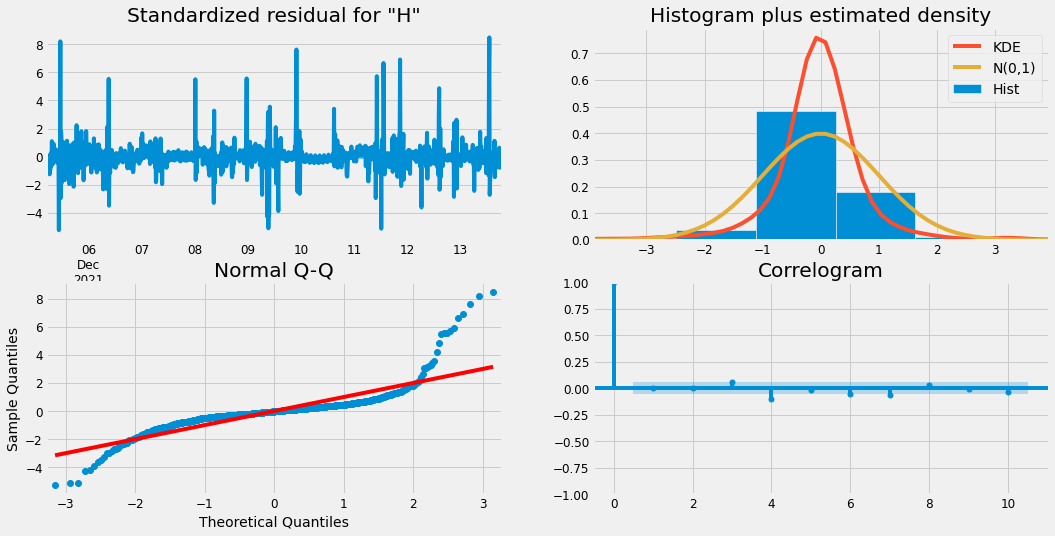

In [618]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

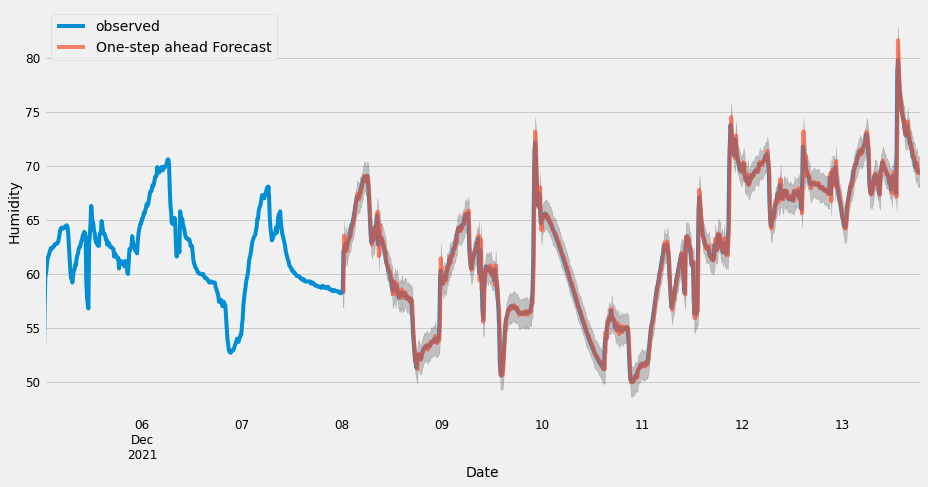

In [666]:
pred = results.get_prediction(start=pd.to_datetime('2021-12-8 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = yNew[0:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.legend()
# plt.savefig('arima.png') 
plt.show()


In [633]:
y_forecasted = pred.predicted_mean
# y_truth = yNew['2021-11-17 00:00:00':]
y_truth = yNew['2021-11-17 00:00:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.53
The Root Mean Squared Error of our forecasts is 0.73


In [634]:
# new_index = pd.period_range(yNew.index[0], yNew.index[-1], freq='10min')
# ts_log = yNew.reindex(new_index)

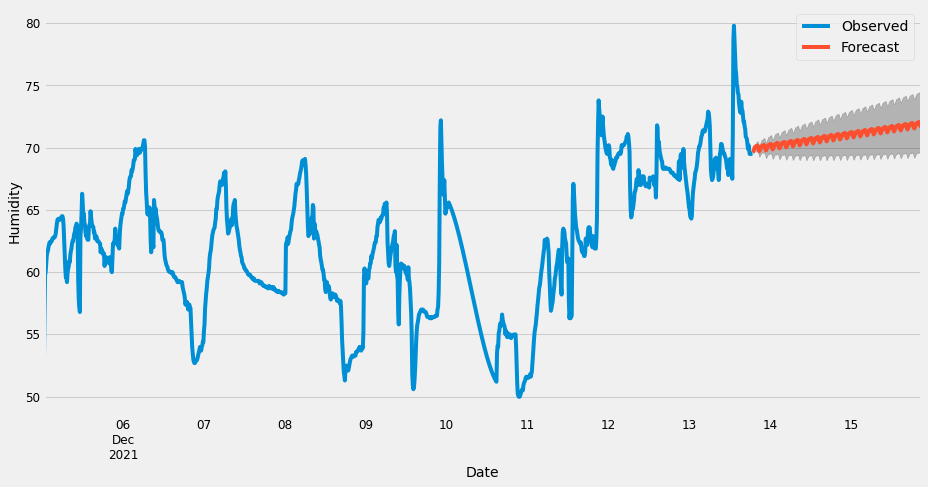

In [664]:
pred_uc = results.get_forecast(steps=300)
pred_ci = pred_uc.conf_int(alpha = 0.9)
# print(pred_ci)
ax = yNew.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.legend()
# plt.savefig('arimanext.png')
plt.show()


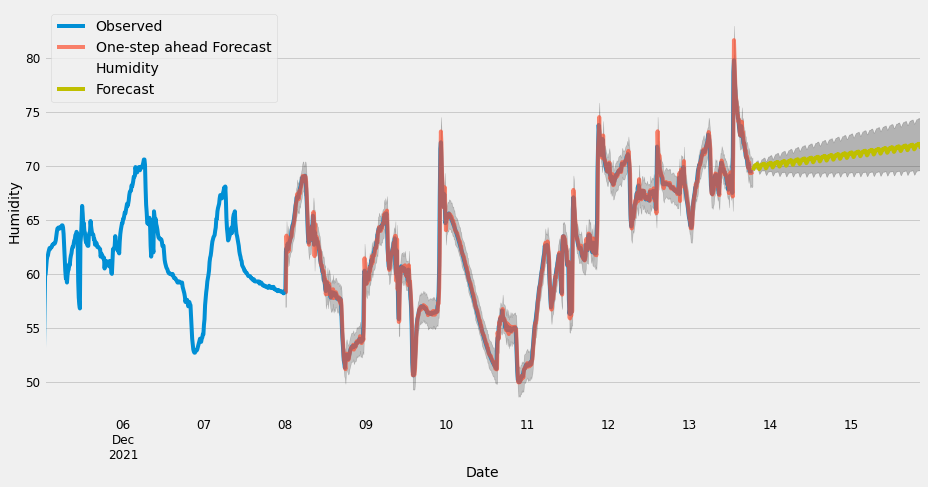

In [665]:
pred = results.get_prediction(start=pd.to_datetime('2021-12-8 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = yNew[0:].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Humidity')
plt.legend()
# plt.show()

pred_uc = results.get_forecast(steps=300)
pred_ci = pred_uc.conf_int(alpha = 0.9)
# print(pred_ci)
ax = yNew.plot(figsize=(14, 7), alpha=0)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='y')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.legend()
# plt.savefig('arimaall.png')
plt.show()


In [644]:
#  https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b